# RECOMMENDATION ENGINES - AMAZON TOYS AND GAMES

## GROUP C
- Nikolas Artadi
- Camila Vasquez
- Assemgul Khametova
- Miguel Frutos

## TASK
- **DATA SELECTION AND PRE-PROCESSING**(Mandatory)
First, you need to select a product category (from the “Small subsets for experiment”) and download the related file to create a training dataset and a testing dataset for the experiment. A recommended standard pre-processing strategy is that: each user randomly selects 80% of their ratings as the training ratings and uses the remaining 20% ratings as testing ratings.
- **COLLABORATIVE FILTERING RECOMMENDER SYSTEM** (Mandatory)
Based on the training dataset, you should develop a Collaborative Filtering model/algorithm to predict the ratings in the testing set. You may use any existing algorithm implemented in Surprise (or any other library) or develop new algorithms yourself. After predicting the ratings in the testing set, evaluate your predictions by calculating the RMSE.
- **CONTENT-BASED RECOMMENDER SYSTEM** (Mandatory)You should leverage the textual
information related to the reviews to create a Content-based RS to predict the ratings for the users in the test set. I do recommend you make use of the lab session related to the topic.
- **HYBRID HS**(Optional)
As an extra, you can propose a hybrid recommender system joining the operation of the two previously developed systems. To that end, you can make use of any of the ideas explained in class.
    
## DATASET
We follow the data set Toys and Games in the following [source](http://deepyeti.ucsd.edu/jianmo/amazon/index.html).

### Ratings only features explanation
- **reviewerID/user-id** - ID of the reviewer, e.g. A2SUAM1J3GNN3B
- **asin/product-id** - ID of the product, e.g. 0000013714
- **reviewerName** - name of the reviewer
- **helpful/helpfulness** - helpfulness rating of the review, e.g. 2/3 [#users that think this review is not helpful,
#users that think this review is helpful]
- **reviewText/review** - text of the review
- **overall/rating** - rating of the product
- **summary/title** - summary of the review
- **unixReviewTime/timestamp** - time of the review (unix time)
- **reviewTime** - time of the review (raw)
    
### Product Metadata set
- **asin** - ID of the product, e.g. 0000031852
- **title** - name of the product
- **feature** - bullet-point format features of the product
- **description** - description of the product
- **price** - price in US dollars (at time of crawl)
- **imageURL** - url of the product image
- **imageURL** - url of the high resolution product image
- **related** - related products (also bought, also viewed, bought together, buy after viewing)
- **salesRank** - sales rank information
- **brand** - brand name
- **categories** - list of categories the product belongs to
- **tech1** - the first technical detail table of the product
- **tech2** - the second technical detail table of the product
- **similar** - similar product table

# LET´S GET STARTED

 ## LIBRARIES INSTALATION

In [2]:
# ! pip install scikit-surprise
# ! pip install plotly
# ! pip install seaborn

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

from surprise import SVDpp
from surprise import SVD
from surprise import KNNBaseline
from surprise import SVDpp
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import SlopeOne

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt

## READ DATA

In [3]:
# df = pd.read_json('game_toy.json',lines=True)

# Ratings data
original = pd.read_json('/Users/niko/Desktop/Recommnedation systems/project/ratings_game_toy.json',lines=True)

# Games and Toys description
meta_game_toy = pd.read_json('/Users/niko/Desktop/Recommnedation systems/project/meta_Toys_and_Games.json',lines=True)

# Merge both datasets together to facilitate their use
df_merged = pd.merge(original, meta_game_toy, on='asin', how='inner')


# Split dataset into trainset and testset at 80% for training of the total data
trainset, testset = train_test_split(df_merged, train_size=0.80,random_state=42)

df = trainset

# test_dataset.to_json('test_dataset.json')

In [63]:
# Take a random sample of the df for faster iteration through the code with a small amount of 5%
# For testing the code utilize 50% of the total sample and "more real" results will be displayed
df = trainset

df = df.sample(frac=0.50, random_state=5)

## ANALYZE THE DATA

Take a quick look at the data to check if the dataset is correctly uploaded and to understand the variable´s content and the schema.

In [64]:
df.shape

(48964, 27)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48964 entries, 10379 to 27876
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviewerID       48964 non-null  object
 1   asin             48964 non-null  object
 2   reviewerName     48731 non-null  object
 3   helpful          48964 non-null  object
 4   reviewText       48964 non-null  object
 5   overall          48964 non-null  int64 
 6   summary          48964 non-null  object
 7   unixReviewTime   48964 non-null  int64 
 8   reviewTime       48964 non-null  object
 9   category         48964 non-null  object
 10  tech1            48964 non-null  object
 11  description      48964 non-null  object
 12  fit              48964 non-null  object
 13  title            48964 non-null  object
 14  also_buy         48964 non-null  object
 15  tech2            48964 non-null  object
 16  brand            48964 non-null  object
 17  feature          48964 non-

In [66]:
df.describe()
# We can see that the ratings have min of 1 and max of 5

,overall,unixReviewTime
count,48964.000000,4.896400e+04
mean,4.353219,1.343272e+09
std,0.993434,7.049345e+07
min,1.000000,9.676800e+08
25%,4.000000,1.329437e+09
50%,5.000000,1.364429e+09
75%,5.000000,1.388016e+09
max,5.000000,1.406074e+09


In [67]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
10379,A2Z60PVKWFO3SW,B00005MP02,"Learning All The Time ""It's Never Too Late to...","[0, 0]",My whole family enjoys this simple vocabulary ...,5,Great Family Game,1226793600,"11 16, 2008","[Toys & Games, Games, Board Games]",...,"[Team or individual play, Thirty-six starting ...","[>#296,422 in Toys & Games (See Top 100 in Toy...","[B004Y82AG6, B001QOGXPK, B00ALQFYGI, B004INGVH...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$59.99,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
81570,A2MRH36J6P1IQH,B0064Z54Z6,scottw,"[0, 0]",My 5 and 3 year olds have a little trouble pus...,5,"cool toys, but a little tough for very young h...",1398470400,"04 26, 2014","[Toys & Games, Building Toys, Building Sets]",...,[The assortment of pieces allows you to build ...,"[>#402,619 in Toys & Games (See Top 100 in Toy...","[B0064Z550U, B00KH6DYXM, B00KH6BQJG, B0048EKSL...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$48.39,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
48254,AN0ILVRWZUV4E,B001N4RAJG,Amazon Customer,"[0, 0]","Hey It's Sunnydale Chick, I'm Back....it was l...",5,And He Has The Power!,1385942400,"12 2, 2013","[Toys & Games, Action Figures & Statues, Actio...",...,[MOTU],"[>#258,924 in Toys & Games (See Top 100 in Toy...",[],Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$188.00,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
53886,AF9AF3GCFXXYD,B0028K2Q8O,RDS,"[0, 0]",We played this with our almost 6 year old and ...,5,Fun game,1380672000,"10 2, 2013","[Toys & Games, Games, Board Games]",...,"[Trick or Treat with the Peanuts Pals, Fun for...","[>#680,198 in Toys & Games (See Top 100 in Toy...","[B001E2D4WE, B01ISKTDLA, B07GJYBD9C, B011GK738...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$73.99,[],[],{}
76559,A3SIFPKLMOY07N,B005E7A202,Richard Aubin,"[5, 5]","At its core, this is really two reviews - pare...",4,Cartoonish Campfire Captures the Kids' Imagina...,1323907200,"12 15, 2011","[Toys & Games, Dress Up & Pretend Play, Preten...",...,"[No-heat fire light, Looks real/feels cool, Gl...","[>#528,086 in Toys & Games (See Top 100 in Toy...","[B009ZWTAPA, B005E7A21Q, B00T83WRK6]",Toys & Games,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30776,A1QN77ANOOPMMF,B000H6FMAA,Kathleen C.,"[0, 0]",My daughter loves all the different things tha...,5,great variety,1388534400,"01 1, 2014","[Toys & Games, Dolls & Accessories, Playsets]",...,"[This 30-piece set includes a bib, a plate, tw...","[>#56,451 in Toys & Games (See Top 100 in Toys...","[B0037UP9GU, B079R2Z528, B01L9O8FDE, B01L9N53H...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
88818,AGE1KK0E2THTN,B007B4HGFA,Connie,"[0, 0]",I purchased a bunch of Mario characters for my...,5,A Nice Plush Toy,1386547200,"12 9, 2013","[Toys & Games, Stuffed Animals & Plush Toys]",...,"[Rare collectible, Made from high-quality mate...","[>#352,963 in Toys & Games (See Top 100 in Toy...","[B0725K12J3, B00DJFYLTE, B009C02OKI, B01MR2T45...",Toys & Games,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
56254,A3U0PUGIPYASEA,B002RLE2TK,Evil Queen Mommy,"[0, 0]","I like the idea, so my son can put in his own ...",3,"Great, but it stopped working",1348876800,"09 29, 2012","[Toys & Games, Kids' Electronics, Music Player...",...,"[4 discs for a total of 16 song

We have included an EDA and have identified duplicates and missing data which we will handle in the next steps.

In [68]:
def missing_values_percentage(df):
    """Return the % of missing values for each pd.series inside the Dataframe"""
    for i in df:
        missing_values_percentage = 100*df.isnull().sum()/df.isnull().count()
    return (missing_values_percentage[missing_values_percentage > 0]) 

In [69]:
missing_values_percentage(df)

reviewerName    0.475860
details         0.792419
dtype: float64

In [70]:
#Count Reviewers´s number of evaluation
df.value_counts('reviewerID')

reviewerID
AJGU56YG8G1DQ     139
A1M8AYAL3L8ACP     67
A2WW57XX2UVLM6     49
A1II2ZRPKZAQQD     47
A1POFVVXUZR3IQ     45
                 ... 
A3S90O1BI21EJK      1
A3S8C41QV6G2QL      1
A28XKGHLARSPQQ      1
A3S801EXW1YK1       1
A2WCA2GRF78DWN      1
Length: 16928, dtype: int64

In [71]:
#Decided to drop column review name as we have a 50% of missing values and the adding value of this column is zero.
del df['reviewerName']

In [72]:
missing_values_percentage(df)

details    0.792419
dtype: float64

In [73]:
#Drop duplicates
df.drop_duplicates
#Result, zero entire duplicated rows in game_toy dataset

<bound method DataFrame.drop_duplicates of            reviewerID        asin helpful  \
10379  A2Z60PVKWFO3SW  B00005MP02  [0, 0]   
81570  A2MRH36J6P1IQH  B0064Z54Z6  [0, 0]   
48254   AN0ILVRWZUV4E  B001N4RAJG  [0, 0]   
53886   AF9AF3GCFXXYD  B0028K2Q8O  [0, 0]   
76559  A3SIFPKLMOY07N  B005E7A202  [5, 5]   
...               ...         ...     ...   
30776  A1QN77ANOOPMMF  B000H6FMAA  [0, 0]   
88818   AGE1KK0E2THTN  B007B4HGFA  [0, 0]   
56254  A3U0PUGIPYASEA  B002RLE2TK  [0, 0]   
54373  A1AIHD59JXEEDU  B002AK5EUY  [0, 0]   
27876  A1MA0AXH2GTOIM  B000EUKRY0  [0, 0]   

                                              reviewText  overall  \
10379  My whole family enjoys this simple vocabulary ...        5   
81570  My 5 and 3 year olds have a little trouble pus...        5   
48254  Hey It's Sunnydale Chick, I'm Back....it was l...        5   
53886  We played this with our almost 6 year old and ...        5   
76559  At its core, this is really two reviews - pare...        4   
..

In [74]:
df.sort_values("helpful", ascending=False).head(5)

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,tech1,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
73831,A4LD7XC56J3ZV,B004Z7H07K,"[1431, 1502]",Hi! I am Erin T. and I run a website called th...,5,My Son Won't Put it Down,1313712000,"08 19, 2011","[Toys & Games, Kids' Electronics, Electronic L...",,...,"[Introducing LeapPad Explorer, the personalize...","[>#261,727 in Toys & Games (See Top 100 in Toy...",[],Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
22822,ASGI7E0AJ8H5X,B0006O8Q7Y,"[1247, 1258]","Prior to purchasing, I searched all over to tr...",5,ultra stomp rocket vs junior stomp rocket,1231718400,"01 12, 2009","[Toys & Games, Learning & Education, Science, ...",,...,"[100% KID powered: Run, jump and STOMP to laun...",[>#995 in Toys & Games (See Top 100 in Toys & ...,[],Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$17.99,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
123,A1ZO9D554VQO9F,0975277324,"[809, 842]","This is an excellent game for 2-5 players, and...",5,A step above the run of the mill games,1110412800,"03 10, 2005","[Toys & Games, Games, Board Games]",,...,"[For 2-5 players, Tons of replay value, One of...",[>#80 in Toys & Games (See Top 100 in Toys & G...,"[B014Q1XX9S, B000809OAO, B01IHOV8ME, B00U26V4V...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.97,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
54065,AQ3CTPAMAF3IJ,B00296QV1K,"[583, 594]",Note number one - you need to buy a light bulb...,4,"Time consuming ""fun"" for the creative kid",1254700800,"10 5, 2009","[Toys & Games, Arts & Crafts, Drawing & Painti...",,...,[Create fun crayon color combinations by melti...,"[>#356,972 in Toys & Games (See Top 100 in Toy...","[B00CI6JB6I, B01CIMCCL2, B0762MN9ZM, B00NHQE4S...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
5636,ASGI7E0AJ8H5X,B00000K3BR,"[579, 594]",First a description of the Junior Stomp Rocket...,5,junior stomp rocket vs ultra stomp rocket...,1231200000,"01 6, 2009","[Toys & Games, Sports & Outdoor Play, Blasters...",,...,"[Jr. Glow Stomp Rockets glow-in-the-dark, so t...",[>#307 in Toys & Games (See Top 100 in Toys & ...,"[B0006O8Q7Y, B075VZJ7C2, B00GAC6470, B00297OCZ...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$14.99,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}


## FEATURE EXTRACTION

This is a core step for the Content-based RS to identify similar contents and the creation of user profiles. <br>
The "helpful" feature covers the evaluation of the review by other potential customers (splited in not helpful and helful). To increase the readiness of the model through the data, we will separate it into 2 different columns.

In [75]:
df['users_nothelpful']=df.helpful.str[0]
df['users_helpful']=df.helpful.str[1]

# Analyze the data

### See the count of ratings per rating

In [76]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Count the number of times each rating appears in the dataset
data = df['overall'].value_counts().sort_index(ascending=False)

# Create the histogram
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} Toys and Games Ratings'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

Most of the reviews are at 5, this shows an extremely skewed graph and therefore we can infer that the ratings given in this data set are strongly biased as most lay between 4 and 5. We have over 80% of users rating positively the product.

### See the number ratings per product

In [77]:
# Number of ratings per game_toy
data = df.groupby('asin')['overall'].count()

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'overall',
                     xbins = dict(start = 0,size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Product',
                   xaxis = dict(title = 'Number of Ratings Per Product ID'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

We can clearly see a long tail of reviews per product. Only almost 50 products have most of the total reviews and the rest have extremely low reviews.

### See the number of ratings per users

In [78]:
# Number of ratings per user
data = df.groupby('reviewerID')['overall'].count()
# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0, size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per User',
                   xaxis = dict(title = 'Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In this segement, the similar scenario happened as in the previous case. We see a high distribution among a small amount of users and an extremely long tail among the latter ones.

We can now savely remove those users that fall below our threshhold of at least 50 reviews.

In [79]:
# Removing those users that have a rating below the threshhold

tresh = 9
sub_df = df[df.groupby('reviewerID')['overall'].transform('count')<tresh].copy() 
print('Old shape: ',df.shape[0],'rows')
print('New shape: ',sub_df.shape[0],'rows')
print('Difference: ',-df.shape[0]+sub_df.shape[0],'rows')

Old shape:  48964 rows
New shape:  41068 rows
Difference:  -7896 rows


# Start of the collaborative filtering RS

In [97]:
# Because the dataset has more than 40k rows at 30%, we will use only the first 20k rows

s_sub_df = sub_df.iloc[:20000]

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(s_sub_df[['reviewerID', 'title', 'overall']], reader)

### 1. KNN

In [98]:
sim_options = {'name':'pearson_baseline'}

knn = KNNBaseline(k=40,min_k=2,sim_options=sim_options,verbose=True)

results = cross_validate(knn,data,measures=['RMSE','MAE'],cv=3,verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9558  0.9787  0.9626  0.9657  0.0096  
MAE (testset)     0.7463  0.7557  0.7487  0.7502  0.0040  
Fit time          2.26    2.35    2.27    2.29    0.04    
Test time         0.06    0.06    0.06    0.06    0.00    


The RMSE is almost 91% (around 96% with when running 50% of t he dataset and the first 20k rows) with slights variations. Which shows a stable results over the 3 folds.

In [99]:
cross_validate(NormalPredictor(), data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm NormalPredictor on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.2701  1.2684  1.2632  1.2672  0.0030  
Fit time          0.02    0.02    0.02    0.02    0.00    
Test time         0.04    0.04    0.04    0.04    0.00    


{'test_rmse': array([1.27014793, 1.26836598, 1.26315853]),
 'fit_time': (0.016801118850708008,
  0.019086837768554688,
  0.019102096557617188),
 'test_time': (0.04353618621826172, 0.04152417182922363, 0.04181671142578125)}

We can understand that KNN is learning from the dataset given. At this point almost 1.27 is the threshold for all the whole dataset.

Tuning the KNN

In [100]:
sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNBaseline, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

The best configuration corresponds to a item-based configuration using Mean Square distance with a min support equals to 5, which is able to slightly reduce the RMSE to 0.92 (around 95% with when running 50% of t he dataset and the first 20k rows). Which is similar to the first baseline we ran with KNN.

### 2. Matrix Factorization

In [101]:
from surprise import SVDpp

# We'll use the famous SVD algorithm.
svd = SVDpp()

results = cross_validate(svd, data, measures=['RMSE'], cv=3, verbose=False)

### 3. Benchmarking

### Basic algorithms

* With the Surprise library, we will benchmark the following algorithms

#### NormalPredictor

* NormalPredictor algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal. This is one of the most basic algorithms that do not do much work.

#### BaselineOnly

* BasiclineOnly algorithm predicts the baseline estimate for given user and item.

### k-NN algorithms

#### KNNBasic

* KNNBasic is a basic collaborative filtering algorithm.

#### KNNWithMeans

* KNNWithMeans is basic collaborative filtering algorithm, taking into account the mean ratings of each user.

#### KNNWithZScore

* KNNWithZScore is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user.

#### KNNBaseline

* KNNBaseline is a basic collaborative filtering algorithm taking into account a baseline rating.

### Matrix Factorization-based algorithms

#### SVD

* [SVD algorithm is equivalent to Probabilistic Matrix Factorization](http://papers.nips.cc/paper/3208-probabilistic-matrix-factorization.pdf)

#### SVDpp

* The SVDpp algorithm is an extension of SVD that takes into account implicit ratings.

#### NMF

* NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar with SVD.

### Slope One

* [Slope One is a straightforward implementation of the SlopeOne algorithm.](https://arxiv.org/abs/cs/0702144)

### Co-clustering

* [Co-clustering is a collaborative filtering algorithm based on co-clustering](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.113.6458&rep=rep1&type=pdf)

[Source](https://colab.research.google.com/github/singhsidhukuldeep/Recommendation-System/blob/master/Building_Recommender_System_with_Surprise.ipynb#scrollTo=1BKNsZL_6ttL)

In [102]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(),KNNBasic(),KNNWithMeans(),KNNWithZScore(),SlopeOne(), BaselineOnly(), CoClustering()]:
    
    print("Testing {}".format(algorithm))
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
        

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Testing <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f97c1624460>
Testing <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7f97831f1250>
Testing <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7f978bcc4eb0>
Testing <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7f9785424760>
Testing <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f86eec631c0>
Testing <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7f97856ea610>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Testing <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f97856ea9a0>
Computing the msd similarity matrix...
Done computing similarity matrix

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.960038,1.368153,0.064164
KNNBaseline,0.961566,2.030687,0.062524
SVD,0.964524,0.826465,0.039770
BaselineOnly,0.967627,0.064162,0.030004
KNNBasic,0.981283,2.018326,0.057505
KNNWithZScore,1.078402,2.436749,0.066466
SlopeOne,1.083176,0.710771,0.040685
SlopeOne,1.084025,0.687104,0.041924
KNNWithMeans,1.086533,2.122996,0.052082


SVD++ does take the longest to fit the model but has the best performance. In this case, there is only a somewhat better performance than SVD++ are SVD and the KNNBaseline and depending on how fast we want customer to be influenced by the recommendation we can select a fast model like SVD or even an easy one like KNNBaseline or BaselineOnly. BaselineOnly has a fast test time and is not too far away as the rest of the results.

## Try out the solution

In [103]:
# Execute KNN
sim_options = {'name': 'pearson_baseline', 'user_based': False}
knn = KNNBaseline(sim_options=sim_options)
knn.fit(data.build_full_trainset())

# Target game_toy to analyze its neighbourhood
game_name = 'LeapFrog Fridge Words Magnetic Word Builder'

# Get the closes neighbourds
neighbors = knn.get_neighbors(knn.trainset.to_inner_iid(game_name), k=10)
# Translate the internal ids used in the algorithm to the game_toy names
neighbors = (knn.trainset.to_raw_iid(inner_id) for inner_id in neighbors)

print()
print('The 10 nearest neighbors of {} are:\n'.format(game_name))
for game in neighbors:
    print("\t",game)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

The 10 nearest neighbors of LeapFrog Fridge Words Magnetic Word Builder are:

	 Think Fun Smart Mouth Word Game
	 Ogobild Nexus
	 HeMan Masters of the Universe Classics Action Figure
	 Great Pumpkin Charlie Brown Board Game
	 Campfire Kids Campfire
	 Learning Resources Counting Cookies
	 Nerf N-Strike Jolt Blaster (orange)
	 Hello Sunshine Game
	 Barbie Collector Twilight Saga Eclipse Alice Doll
	 Fisher-Price Sesame Street Silly Sounds Remote


We can now easily identify which reviews match the nearest neighbours for specific toys. In general, the game displayed make sense for recommending it to small boys.

## Analyze bias

> Best games

In [104]:
game_name = [(b, data.build_full_trainset().to_raw_iid(i)) for i, b in enumerate(svd.bi)]

In [105]:
# game_name = [(b, data.build_full_trainset().to_raw_iid(i)) for i, b in enumerate(svd.bi)]
print("Worst games:")
sorted(game_name, key=lambda x: x[0])[:15]

Worst games:


[(-0.9353269164173124,
  'Melissa &amp; Doug African Plains Safari Wooden Jigsaw Puzzle With Storage Tray (24 pcs)'),
 (-0.9333566103847786,
  'Fisher-Price Laugh &amp; Learning Kitchen [Amazon Exclusive]'),
 (-0.8445261669803618, 'Fisher-Price Brilliant Basics Rock-a-Stack'),
 (-0.8430266317555477, 'Little Tikes Light and Go Thomas Flashlight'),
 (-0.7824144473175839,
  'Melissa &amp; Doug Easel Companion Accessory Set, Arts &amp; Crafts, Promotes Creativity, 25 Pieces, 10.5&rdquo; H x 5&rdquo; W x 19&rdquo; L'),
 (-0.777014981546858, 'Martian Matter Alien Maker Playset  -  Spaceship'),
 (-0.7517763251920664, 'Kings in the Corner Game'),
 (-0.7447798403490842, 'LEGO Ninjago Rattlecopter 9443'),
 (-0.7425054128922978, 'Fisher-Price Octonauts Octo Compass'),
 (-0.7242348715992064, 'Corolle Mon Premier Calin Laughing Flowers Baby Doll'),
 (-0.7084558102870445,
  'Monster High Art Class Skelita Calaveras Doll (Discontinued by manufacturer)'),
 (-0.707496415317517, 'Bruder Toys Loader Back

> Worst games

In [106]:
print("Best games:")
sorted(game_name, key=lambda x: -x[0])[:15]

Best games:


[(0.4410415631129814,
  'Monster High Create-A-Monster Vampire and Sea Monster Starter Set'),
 (0.4235800951429117, 'VTech Crazy Legs Learning Bug,Red'),
 (0.37100662827142006, 'Playhut Jake and The Neverland Pirates - Playville'),
 (0.36269190735095713, 'Syma S109G 3.5 Channel RC Helicopter with Gyro'),
 (0.3584649595870093, 'Zombie Dice'),
 (0.35821916868199144,
  'Crayola Inspiration Art Case: 140 Pieces, Art Set, Gifts for Kids, Age 4, 5, 6'),
 (0.35551373141144416,
  'Patch Products Inc. Repeat Pete - Can you Do What Pete Does Without Missing a Beat'),
 (0.3530923037043308, "Fisher-Price Servin' Surprises Birthday Set"),
 (0.35147278467792076,
  'Kidoozie Little Doctor Kit &ndash; Includes Stethoscope, Blood Pressure Gauge, Reflex Hammer, Thermometer, Squeaking Syringe, Auriscope, Laryngoscope, Pretend Bandage, and Bag &ndash; Ages 24 Months And Up'),
 (0.3484786988084913, 'Cardinal Mexican Train Domino Game with Aluminum Case'),
 (0.34331752462747,
  'Melissa &amp; Doug Stacking 

### User bias

In [107]:
user_bias = [(b, data.build_full_trainset().to_raw_uid(i)) for i, b in enumerate(svd.bu)]

> User with best reviews

In [108]:
best_user = sorted(user_bias, key=lambda x: x[0])[0][1]

In [109]:
df[df.reviewerID == best_user]

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,tech1,...,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,users_nothelpful,users_helpful
3781,A13OBBS94PRVLP,B00000IZQP,"[3, 3]",I had no idea there was a dye issue here and m...,4,No dye issues here and this one's a hit at home,1313280000,"08 14, 2011","[Toys & Games, Baby & Toddler Toys, Stacking &...",,...,"[B01LYNRB3Y, B00005C5H4, B00DJPK8P0, B00E1AEER...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$11.40,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},3,3
29907,A13OBBS94PRVLP,B000GKD09C,"[0, 0]",Got this for a 2 year old and it's already a h...,4,Great for 2-year-old!,1279929600,"07 24, 2010","[Toys & Games, Dress Up & Pretend Play, Preten...",,...,[],Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$11.99,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},0,0
18879,A13OBBS94PRVLP,B0001AEZTG,"[1, 1]",One of two favorite toys at our house. Our ba...,5,Baby loves it,1313280000,"08 14, 2011","[Toys & Games, Learning & Education, Early Dev...",,...,"[B00BQYQZSK, B0002YDPY2, B00000IZQP, B00UAHKCW...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},1,1


> User with worst reviews

In [110]:
worst_user = sorted(user_bias, key=lambda x: x[0])[-1][1]

In [111]:
df[df.reviewerID == worst_user]

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,tech1,...,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,users_nothelpful,users_helpful
6353,A3P98Q692XW2BA,B000038A8C,"[10, 13]",I would consider myself a very lenient judge o...,2,Breyer horses break SO easily!,1179446400,"05 18, 2007","[Toys & Games, Dolls & Accessories, Dolls]",,...,"[B01MS9I8G2, B00A9XC83U, B008CEP7A4, B00RJ5S5P...",Toys & Games,,,$28.99,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},10,13


## Analyze Factors

In [112]:
svd.qi

array([[-0.12816803,  0.0542445 , -0.00900969, ..., -0.07269481,
         0.02883175,  0.01662212],
       [-0.08977659, -0.08529775,  0.01922595, ..., -0.1861419 ,
         0.11845329,  0.00715567],
       [-0.25036216,  0.03709195,  0.25377269, ..., -0.01489183,
        -0.25033274,  0.20770739],
       ...,
       [-0.08241125, -0.08071314, -0.04943228, ..., -0.07598009,
        -0.05139685, -0.1251759 ],
       [-0.18218939, -0.00886437,  0.17277512, ..., -0.03667805,
         0.14500613, -0.13394317],
       [-0.12059498,  0.02561544,  0.1477378 , ...,  0.01941308,
         0.07924426, -0.08214839]])

In [121]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(svd.qi)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

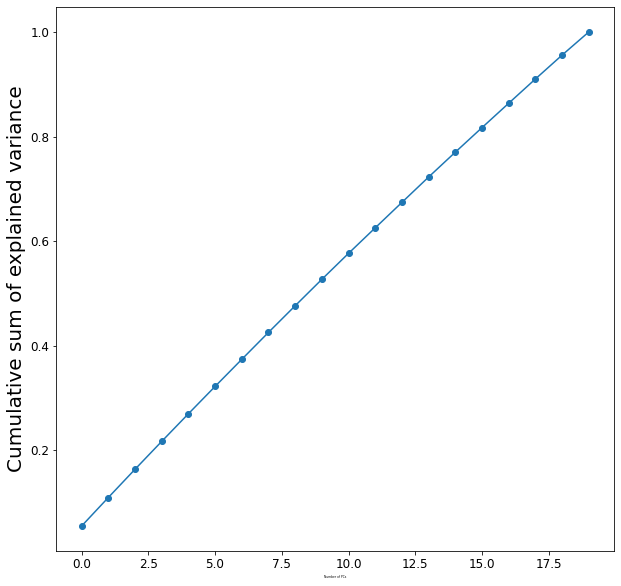

In [122]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of PCs', fontsize=3)
plt.ylabel('Cumulative sum of explained variance' , fontsize=20);

Most variance is explained with 16 principal components. But for practicality we will use only 3.

In [115]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [116]:
principalDf

,principal component 1,principal component 2,principal component 3
0,0.063392,1.158692,1.994255
1,-0.444571,1.719575,0.196400
2,-2.849306,1.333821,1.839384
3,1.769899,-1.023101,0.869412
4,-0.191649,-0.065565,-0.532246
...,...,...,...
5526,0.432531,0.947897,0.575386
5527,0.367594,0.151754,-0.332617
5528,0.425283,0.774074,1.153528
5529,-0.504398,1.673123,1.713319


In [117]:
for row in principalDf.sort_values(by='principal component 1', ascending=False).head(10).iterrows():
    print("Game_Toy: {} with PC value = {}".format(data.build_full_trainset().to_raw_iid(row[0]), row[1][0]))

Game_Toy: Melissa &amp; Doug African Plains Safari Wooden Jigsaw Puzzle With Storage Tray (24 pcs) with PC value = 4.803036758857552
Game_Toy: Yamslam with PC value = 3.9034930474292167
Game_Toy: Little Tikes Big Adventures Construction Peak Rail And Road with PC value = 3.859849743580841
Game_Toy: Ty Classic Cobbler Cat in Orange and White with PC value = 3.8416080157142267
Game_Toy: Risk: The Game of Strategic Conquest with PC value = 3.547484188237688
Game_Toy: Crayola Create 2 Destroy Dino Destruction Stomping Mall with PC value = 3.4027472203444757
Game_Toy: LEGO Star Wars Clone Troopers vs Droidekas 75000 with PC value = 3.386836165226067
Game_Toy:  Super Mario Plush - 11&quot; Waluigi Soft Stuffed Plush Toy Japanese Import with PC value = 3.2321131046021088
Game_Toy: Fisher-Price Laugh &amp; Learn Love to Play Puppy with Bonus CD with PC value = 3.1476795641640503
Game_Toy: Liquid Ass with PC value = 3.0777348388979004


In [118]:
for row in principalDf.sort_values(by='principal component 2', ascending=False).head(10).iterrows():
    print("Game_Toy: {} with PC value = {}".format(data.build_full_trainset().to_raw_iid(row[0]), row[1][1]))

Game_Toy: Power Ranger Samuraizer Morpher with PC value = 5.00449495167258
Game_Toy: Hot Wheels Stunt Chargers Vehicles, Blue with PC value = 4.139271181025014
Game_Toy: McFarlane Toys The Walking Dead TV Series 4, Merle &amp; Daryl Dixon Brothers, 2-Figure Pack with PC value = 3.812920456416312
Game_Toy: Bruder Toys Loader Backhoe with PC value = 3.6630359796846776
Game_Toy: Jumbo Magnifying Glass with PC value = 3.6615195775616964
Game_Toy: Orb Factory Sticky Mosaics: Dinosaurs with PC value = 3.5399171873950652
Game_Toy: Crayola Non-Toxic White Chalk(12 ct box)and Colored Chalk(12 ct box) Bundle with PC value = 3.4924869417853888
Game_Toy: Bandai Tamashii Nations Godzilla Jr. - S.H. MonsterArts with PC value = 3.4754474740814976
Game_Toy: Little Tikes Light and Go Thomas Flashlight with PC value = 3.448860943145249
Game_Toy: Littlest Pet Shop Slide &amp; Dive Playset with PC value = 3.3935330329019693


In [119]:
for row in principalDf.sort_values(by='principal component 3', ascending=False).head(10).iterrows():
    print("Game_Toy: {} with PC value = {}".format(data.build_full_trainset().to_raw_iid(row[0]), row[1][2]))

Game_Toy: Superman Man of Steel Movie Masters Faora Action Figure with PC value = 4.00212065069
Game_Toy: Step2 Infant To Toddler Swing Seat, Turquoise with PC value = 3.5903815335686624
Game_Toy: Fisher-Price Laugh &amp; Learning Kitchen [Amazon Exclusive] with PC value = 3.4495730438997905
Game_Toy: Mattel Games Playchest Games Go Fish with PC value = 3.4260657369716934
Game_Toy: Thomas &amp; Friends Snowy Day 35-Piece Puzzle in a Round Tin with PC value = 3.3162929610946104
Game_Toy: Hubsan X4 H107 H107L Quadcopter Propeller Blades Protection Guard Cover Black with PC value = 3.3141636667277536
Game_Toy: Ravensburger Labyrinth Board Game for Kids and Adults - Easy to Learn and Play With Great Replay Value with PC value = 3.256497114549407
Game_Toy: Collections Etc Flashlight Friends the Huggable Loveable Childs Flash Light Penguin with PC value = 3.2362888064441417
Game_Toy: Melissa &amp; Doug My First ABC Book with PC value = 3.212770283120338
Game_Toy: LEGO Creator Highway Speedst

(When running 50% of t he dataset and the first 20k rows) All PCs do look somehow relevant annd cohesive with small variations.

**PC 1:** Shows almost all the results being for younger kids. It more or less recommends well plush animals and different type of puzzle games for these kids.

**PC 2:** Shows almost all the results being for kids that enjoy playing with small figures or like to draw.


**PC 3:** Shows almost a combination of results for those kids that have younger siblings and are in an age where they can play small strategic table-top games and like to play with major mainstream action figures.

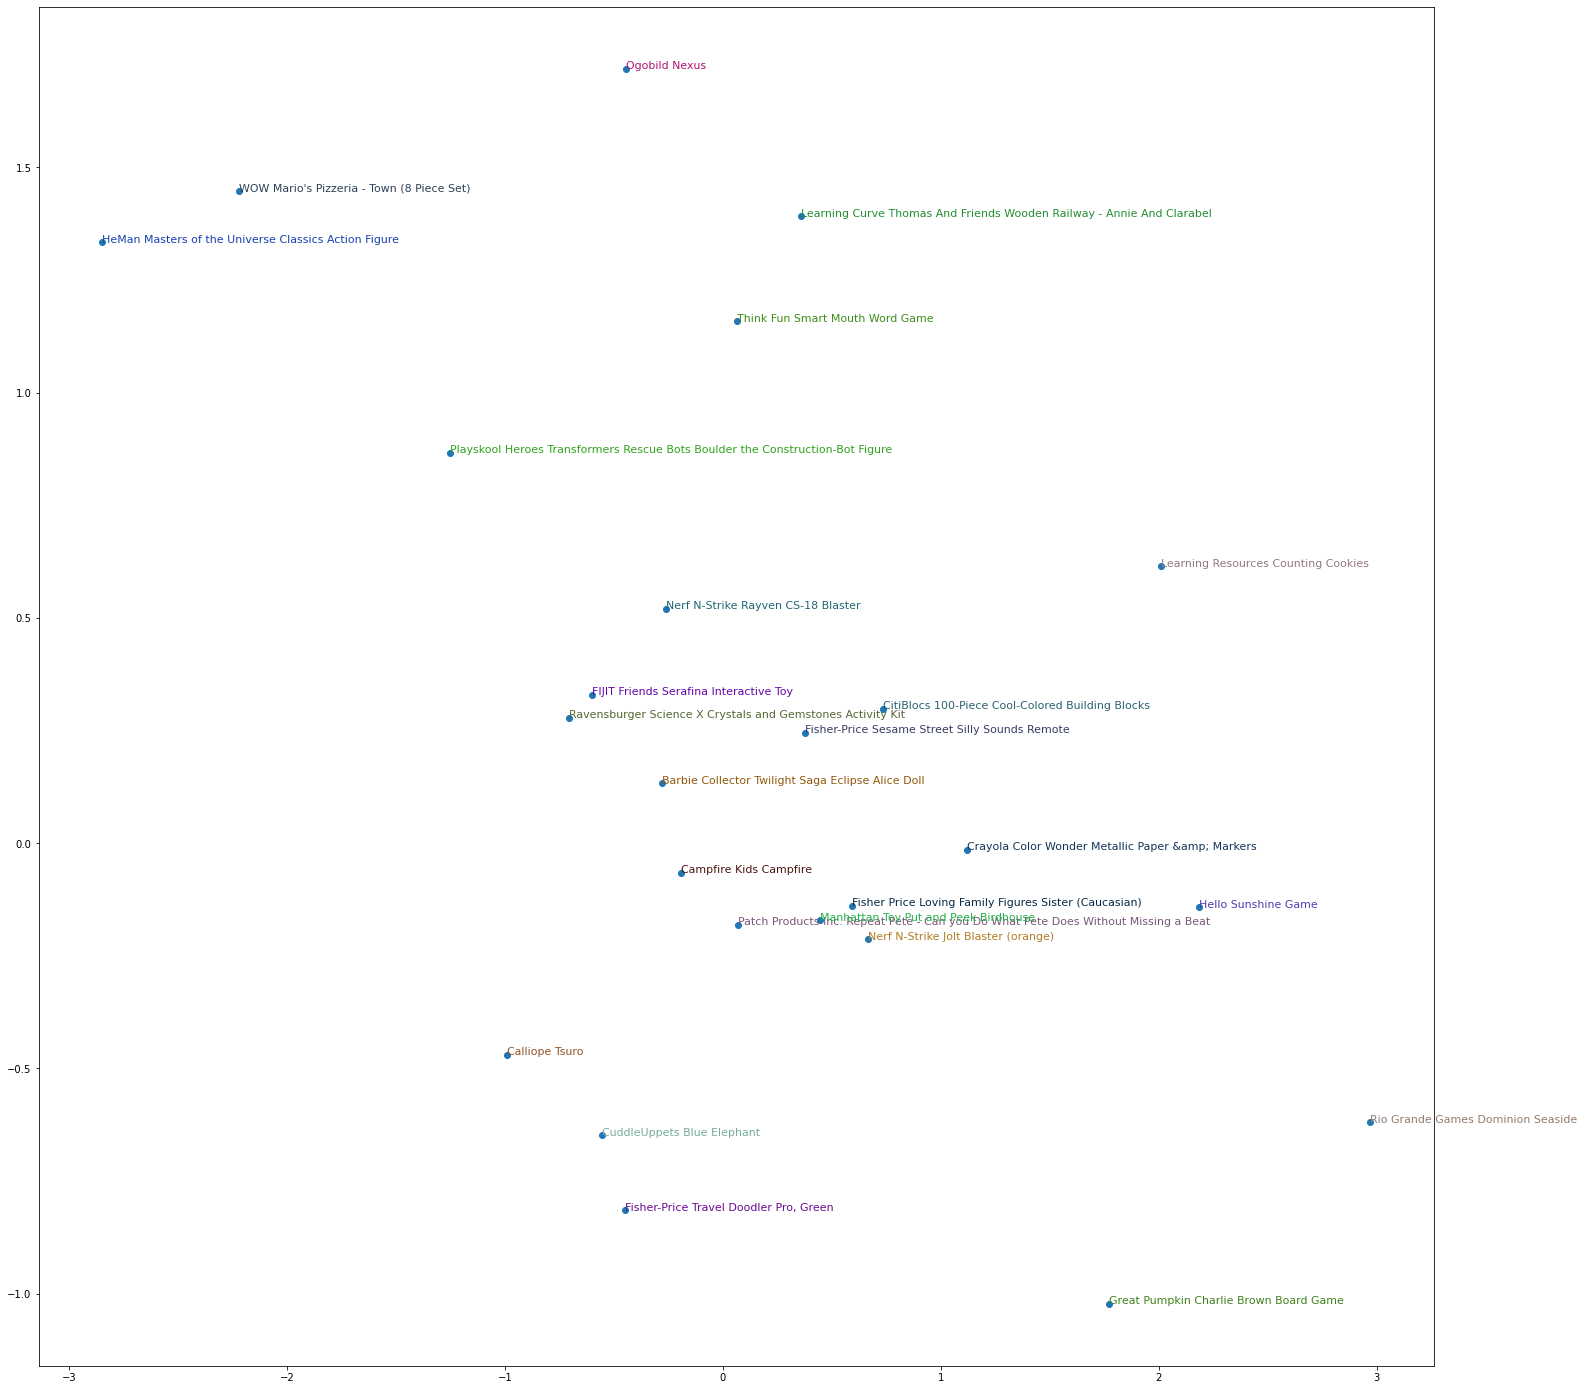

In [123]:
# Taking randomly just 25 games or toys to avoid overcrowding the plot
idxs = np.random.choice(len(principalDf), 100, replace=False) 
idxs = list(range(25))

# Represent the game_toys according to the principal components
X = principalDf.iloc[idxs]['principal component 1'].values
Y = principalDf.iloc[idxs]['principal component 2'].values

# Plot the game_toys
plt.figure(figsize=(25,25))
plt.scatter(X, Y)
for i, x, y in zip([data.build_full_trainset().to_raw_iid(idx) for idx in idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

# CONTENT BASED - Textual Features

## Creating a TF-IDF Vectorizer

In [124]:
from sklearn.metrics.pairwise import linear_kernel 
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
# Unifying the title and feedback of the user into 1 column to rate everything together
df['feedback'] = df['summary'] + " - " + df['reviewText']

In [126]:
text_filtering = df[['asin','feedback']]

text_filtering = text_filtering.reset_index(drop=True)

# Choosing a smaller size, otherwise the Kernel breaks in creating the dictionary with the scores
# text_filtering = text_filtering.iloc[:500]

text_filtering

,asin,feedback
0,B00005MP02,Great Family Game - My whole family enjoys thi...
1,B0064Z54Z6,"cool toys, but a little tough for very young h..."
2,B001N4RAJG,And He Has The Power! - Hey It's Sunnydale Chi...
3,B0028K2Q8O,Fun game - We played this with our almost 6 ye...
4,B005E7A202,Cartoonish Campfire Captures the Kids' Imagina...
...,...,...
48959,B000H6FMAA,great variety - My daughter loves all the diff...
48960,B007B4HGFA,A Nice Plush Toy - I purchased a bunch of Mari...
48961,B002RLE2TK,"Great, but it stopped working - I like the ide..."
48962,B002AK5EUY,"Okey dokey - Nephew loved the puppets, but whe..."


In [127]:
df.shape

(48964, 29)

In [128]:
tfidf = TfidfVectorizer(analyzer='word', min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(text_filtering['feedback'])

In [129]:
feature_names = tfidf.get_feature_names()
ndf = pd.DataFrame(tfidf_matrix.todense(), columns=feature_names)
ndf

/opt/anaconda3/envs/recommendation_engines/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,00,000,0000,000mah,0012,0029,004,006602,00bucks,00happy,...,zulu,zurg,zurich,zx,zylophone,zyma,zynga,zyuranger,zztop,zzzzzzzooooooooooooooooooommmmm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
dict(ndf.sort_values(by=1, ascending=False, axis=1).iloc[1])

{'building': 0.3636200099889588,
 'wacky': 0.32874185781957144,
 'funky': 0.31898386518145994,
 'pieces': 0.2507117549124122,
 'helping': 0.23878672828511413,
 'tough': 0.22539162608206645,
 'pushing': 0.21800706052939872,
 'unique': 0.2142700008759969,
 'trouble': 0.21112857207161645,
 'olds': 0.20046473987278068,
 'mind': 0.1908144685091012,
 'little': 0.18354834332341496,
 'trying': 0.1769854322390702,
 'hands': 0.1636633489717286,
 'young': 0.15949154003297972,
 'definitely': 0.15575700492829433,
 'cool': 0.15564439048228587,
 'bit': 0.13806559405299948,
 'lot': 0.1278416461282375,
 'toys': 0.1250113254407989,
 'don': 0.11788354998090916,
 'really': 0.09989412152652051,
 'year': 0.09202614977826985,
 'like': 0.09070982626300358,
 'toy': 0.09037638345142185,
 'fun': 0.0847063933130286,
 'pondering': 0.0,
 'pone': 0.0,
 'pongs': 0.0,
 'ponder': 0.0,
 'pong': 0.0,
 'poney': 0.0,
 'ponds': 0.0,
 'poncho': 0.0,
 'ponie': 0.0,
 'poms': 0.0,
 'pond': 0.0,
 '00': 0.0,
 'pompadour': 0.0,
 '

## Cosine Similarity

In [131]:
# Compute cosine similarity
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [132]:
# Iterate over the items in the dataset to find the most similar ones to each one
results = {}
for idx, row in text_filtering.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1] 
    similar_items = [(cosine_similarities[idx][i], text_filtering['asin'][i]) for i in similar_indices] 
    results[row['asin']] = similar_items[1:]

In [133]:
def item(id):  
    return text_filtering.loc[text_filtering['asin'] == id]['feedback'].tolist()[0].split(' - ')[0] 

# Just reads the results out of the dictionary
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")   
    print("-------")
    recs = results[item_id][:num]   
    for rec in recs: 
        print("Recommended: " + item(rec[1]) + " (score:" +      str(rec[0]) + ")")

In [134]:
# Recommend with the found textual similarities
recommend(item_id='B00005MP02', num=5)

Recommending 5 products similar to Great Family Game...
-------
Recommended: Great for Learning and Playing Together (score:0.32035864431145683)
Recommended: Great for the early reader arsenal! (score:0.2763270840406426)
Recommended: Fun game, poor execution (score:0.2559838069263813)
Recommended: Good learning game (score:0.2518850772231394)
Recommended: Lowercase! (score:0.239606973985812)
